In [15]:
import pandas as pd
from dowhy import CausalModel

In [38]:
df = pd.read_csv("C:/Users/hanch/OneDrive/Desktop/research/NHEFS/NHEFS.csv")

covariates = [
    "qsmk",
    "wt82_71",
    "sex",
    "age",
    "race",
    "education",
    "smokeintensity",
    "smokeyrs",
    "active",
    "exercise",
    "wt71"
]

df = df[covariates]


In [39]:
data = {
    "data": df,
    "treatment": ["qsmk"],
    "outcome": ["wt82_71"],
    "graph": """
        graph[directed 1
            node[ id "wt82_71" label "wt82_71"]
            node[ id "qsmk" label "qsmk"]
            node[ id "age" label "age"]
            node[ id "sex" label "sex"]
            node[ id "race" label "race"]
            node[ id "education" label "education"]
            node[ id "smokeintensity" label "smokeintensity"]
            node[ id "smokeyrs" label "smokeyrs"]
            node[ id "exercise" label "exercise"]
            node[ id "active" label "active"]
            node[ id "wt71" label "wt71"]
            
            edge[ source "qsmk" target "wt82_71"]

            edge[ source "age" target "qsmk"]
            edge[ source "sex" target "qsmk"]
            edge[ source "race" target "qsmk"]
            edge[ source "education" target "qsmk"]
            edge[ source "smokeintensity" target "qsmk"]
            edge[ source "smokeyrs" target "qsmk"]
            edge[ source "exercise" target "qsmk"]
            edge[ source "active" target "qsmk"]
            edge[ source "wt71" target "qsmk"]
            
            edge[ source "age" target "wt82_71"]
            edge[ source "sex" target "wt82_71"]
            edge[ source "race" target "wt82_71"]
            edge[ source "education" target "wt82_71"]
            edge[ source "smokeintensity" target "wt82_71"]
            edge[ source "smokeyrs" target "wt82_71"]
            edge[ source "exercise" target "wt82_71"]
            edge[ source "active" target "wt82_71"]
            edge[ source "wt71" target "wt82_71"]
        ]
        """


}


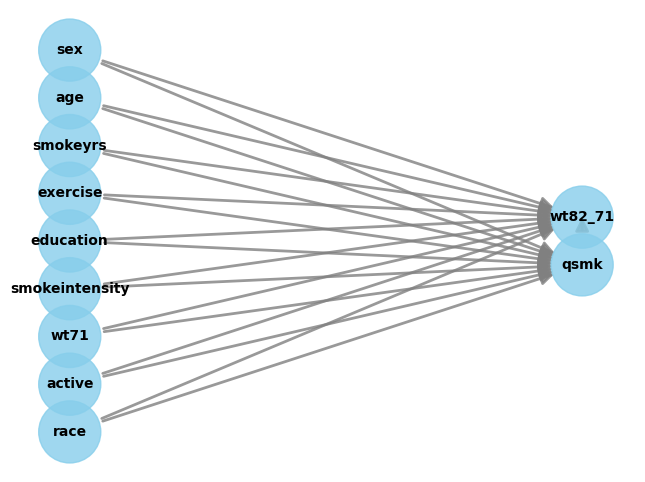

In [40]:
model = CausalModel(
    data = df,
    treatment = data["treatment"],
    outcome = data["outcome"],
    graph = data["graph"]
)

model.view_model()

In [41]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable = True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                           ↪
───────(E[wt_82_71|race,active,wt71,smokeintensity,education,exercise,smokeyrs ↪
d[qsmk]                                                                        ↪

↪           
↪ ,age,sex])
↪           
Estimand assumption 1, Unconfoundedness: If U→{qsmk} and U→wt82_71 then P(wt82_71|qsmk,race,active,wt71,smokeintensity,education,exercise,smokeyrs,age,sex,U) = P(wt82_71|qsmk,race,active,wt71,smokeintensity,education,exercise,smokeyrs,age,sex)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                                                                           ↪
───────(E[wt_82_71|race,active,wt71,smokeintensity,education,exercise,smokeyr

In [43]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                           ↪
───────(E[wt_82_71|race,active,wt71,smokeintensity,education,exercise,smokeyrs ↪
d[qsmk]                                                                        ↪

↪           
↪ ,age,sex])
↪           
Estimand assumption 1, Unconfoundedness: If U→{qsmk} and U→wt82_71 then P(wt82_71|qsmk,race,active,wt71,smokeintensity,education,exercise,smokeyrs,age,sex,U) = P(wt82_71|qsmk,race,active,wt71,smokeintensity,education,exercise,smokeyrs,age,sex)

## Realized estimand
b: wt82_71~qsmk+race+active+wt71+smokeintensity+education+exercise+smokeyrs+age+sex
Target units: ate

## Estimate
Mean value: 3.1178343264309416

